# Other modules for geoscientists

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

=============

Some of the things will not work on ZMAW computers (Iris, Cartopy).

## Iris

 [Iris](http://scitools.org.uk/iris/) seeks to provide a powerful, easy to use, and community-driven Python library for analysing and visualising meteorological and oceanographic data sets. Kind of Ferret replacement. Developed in the Met Office by group of 7 full time developers. There are more than 300 active python users in Met Office.

With Iris you can:

* Use a single API to work on your data, irrespective of its original format.
* Read and write (CF-)netCDF, GRIB, and PP files.
* Easily produce graphs and maps via integration with matplotlib and cartopy.


Here we load data from netCDF file in to *cube* object and plot first time step. Note automatic unpacking, and the title.

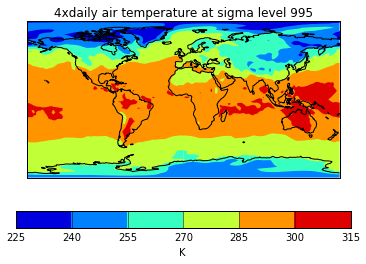

In [1]:
import iris
import iris.quickplot as qplt

temperature = iris.load_cube('air.sig995.2012.nc')

qplt.contourf(temperature[0,:,:])
gca().coastlines()

This is how iris *cube* look like:

In [2]:
print temperature

4xDaily Air temperature at sigma level 995 / (degK) (time: 1464; latitude: 73; longitude: 144)
     Dimension coordinates:
          time                                           x               -              -
          latitude                                       -               x              -
          longitude                                      -               -              x
     Attributes:
          Conventions: COARDS
          GRIB_id: 11
          GRIB_name: TMP
          actual_range: [ 191.1000061  323.       ]
          dataset: NMC Reanalysis
          description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950...
          history: created 2011/12 by Hoop (netCDF2.3)
          least_significant_digit: 1
          level_desc: Surface
          parent_stat: Other
          platform: Model
          precision: 2
          references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
          statistic: Individual Obs
   

We can perform different operations on cubes. For example create zonal mean:

In [3]:
zonal_mean = temperature.collapsed('latitude', iris.analysis.MEAN)

/usr/local/lib/python2.7/dist-packages/Iris-1.6.0_dev-py2.7.egg/iris/coords.py:855: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for "latitude".
  self.name())


<matplotlib.contour.QuadContourSet instance at 0x4a14560>

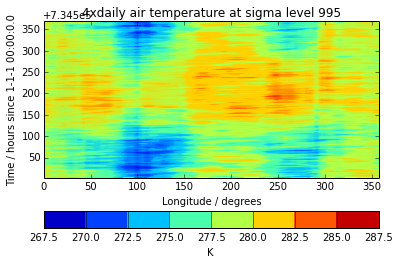

In [4]:
qplt.contourf(zonal_mean)

Here we plot timesiries from one point:

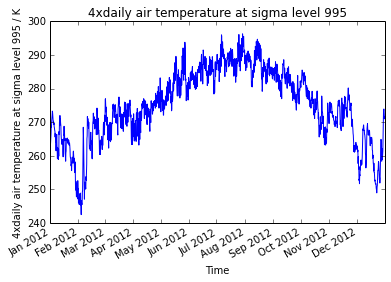

In [5]:
#Code is a bit more complicated in order to fix issue with dates formating
fig = figure()
qplt.plot(temperature[:,10,10])
fig.autofmt_xdate()

Section along longitude:

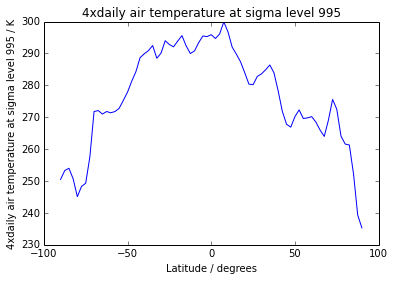

In [6]:
qplt.plot(temperature[0,:,10])

## Cartopy

[Cartopy](http://scitools.org.uk/cartopy/) is a library providing cartographic tools for python.

Some of the key features of cartopy are:

* object oriented projection definitions
* point, line, polygon and image transformations between projections
* integration to expose advanced mapping in matplotlib with a simple and intuitive interface

Simple plot:

In [7]:
import cartopy.crs as ccrs

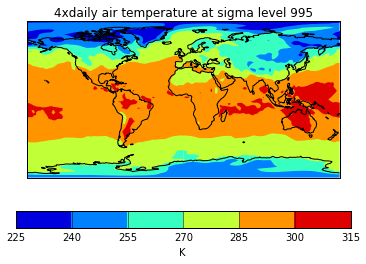

In [8]:
ax = plt.axes(projection=ccrs.PlateCarree())
qplt.contourf(temperature[0,:,:])
gca().coastlines()

We only change projection:

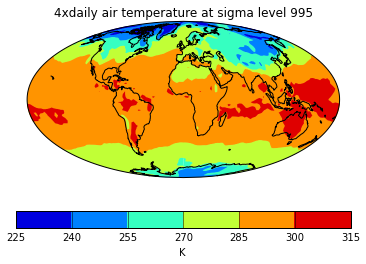

In [9]:
ax = plt.axes(projection=ccrs.Mollweide())
qplt.contourf(temperature[0,:,:])
gca().coastlines()

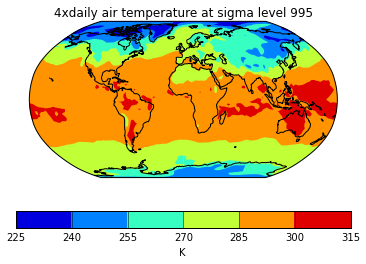

In [10]:
ax = plt.axes(projection=ccrs.Robinson())
qplt.contourf(temperature[0,:,:])
gca().coastlines()

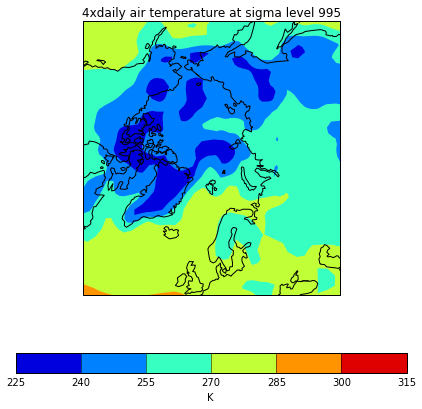

In [11]:
fig = figure(figsize=(7,7))
ax = plt.axes(projection=ccrs.NorthPolarStereo())
ax.set_extent([0, 360, 50, 90], crs=ccrs.PlateCarree())
qplt.contourf(temperature[0,:,:])
gca().coastlines()

One of the things it was originally created for is to handle datelines properly. Below is an example form the [post by Filipe Fernandes](http://ocefpaf.github.io/blog/2013/09/23/cartopy/), that demonstrate this feature. He show how to plot Challenger Expedition track in Basemap and Cartopy.

First download the data:

In [ ]:
!wget https://raw.github.com/ocefpaf/ocefpaf.github.io/master/downloads/notebooks/data/challenger_path.csv

#### Basemap version:

In [12]:
kw = dict(color='#FF9900', linestyle='-', linewidth=1.5)
lon, lat = np.loadtxt('./challenger_path.csv', delimiter=',', unpack=True)

In [13]:
from mpl_toolkits.basemap import Basemap

def make_basemap(projection='robin', figsize=(10, 5), resolution='c'):
    fig, ax = plt.subplots(figsize=figsize)
    m = Basemap(projection=projection, resolution=resolution,
                lon_0=0, ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color='0.85')
    parallels = np.arange(-60, 90, 30.)
    meridians = np.arange(-360, 360, 60.)
    m.drawparallels(parallels, labels=[1, 0, 0, 0])
    m.drawmeridians(meridians, labels=[0, 0, 1, 0])
    return fig, m

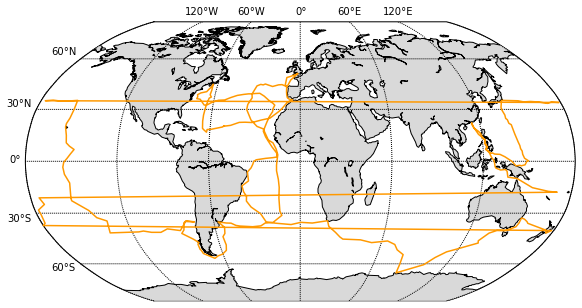

In [14]:
fig, m = make_basemap()
_ = m.plot(*m(lon, lat), **kw)

#### Cartopy version:

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def make_cartopy(projection=ccrs.Robinson(), figsize=(10, 5), resolution='110m'):
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    gl = ax.gridlines(draw_labels=False)  # Only PlateCarree and Mercator plots are currently supported.
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

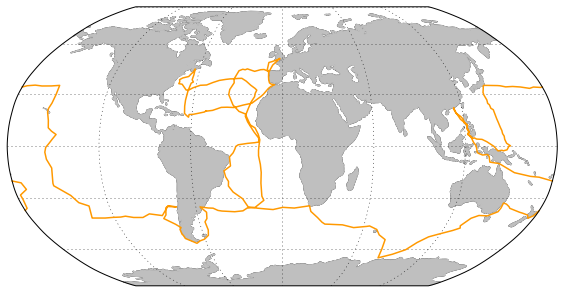

In [16]:
fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')
_ = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

# Pydap

[Pydap](http://www.pydap.org/) is a pure Python library implementing the Data Access Protocol, also known as DODS or OPeNDAP. You can use Pydap as a client to access hundreds of scientific datasets in a transparent and efficient way through the internet; or as a server to easily distribute your data from a variety of formats.

In [17]:
from pydap.client import open_url

We are going to access [sea ice data](http://icdc.zmaw.de/seaiceconcentration_asi_amsre.html?&L=1) from [CliSAP-Integrated Climate Data Center (ICDC)](http://icdc.zmaw.de/)

In [18]:
dataset = open_url("http://icdc.zmaw.de/thredds/dodsC/amsre_asi_nh_2011")

In [19]:
print dataset

{'latitude': <pydap.model.BaseType object at 0x932dd90>, 'longitude': <pydap.model.BaseType object at 0x932ddd0>, 'time': <pydap.model.BaseType object at 0x91dea50>, 'icecon': <pydap.model.BaseType object at 0x91dead0>}


In [20]:
ice = dataset['icecon']

In [21]:
ice.shape

(273, 1792, 1216)

In [22]:
ice.attributes

{'_FillValue': -1000,
 'missing_value': -1000,
 'scale_factor': 0.10000000149011612,
 'units': '%'}

<matplotlib.colorbar.Colorbar instance at 0x8670368>

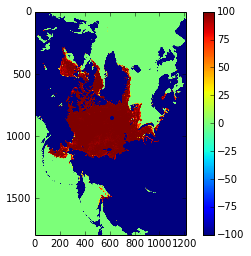

In [23]:
imshow(squeeze(ice[0,:,:])*0.10000000149011612)
colorbar()

## F2PY

The [F2PY](http://www.f2py.com/) project is created to unify the efforts of supporting easy connection between Fortran and Python languages. Example below is from [Using Python and FORTRAN with F2py](http://www.f2py.com/).

Create FORTRAN file (use %%file instead of %%writefile if you on IPython < 1.0):

In [1]:
%%writefile FIB1.F
C FILE: FIB1.F
      SUBROUTINE FIB(A,N)
C
C     CALCULATE FIRST N FIBONACCI NUMBERS
C
      INTEGER N
      REAL*8 A(N)
      DO I=1,N
         IF (I.EQ.1) THEN
            A(I) = 0.0D0
         ELSEIF (I.EQ.2) THEN
            A(I) = 1.0D0
         ELSE 
            A(I) = A(I-1) + A(I-2)
         ENDIF
      ENDDO
      END
C END FILE FIB1.F

Writing FIB1.F


Compile it with f2py:

In [ ]:
!f2py -c -m --fcompiler=gnu95 fib1 FIB1.F

Import resulting **fib1.so** as python library:

In [3]:
import fib1

Read some auto generated documentation:

In [4]:
print fib1.__doc__
print fib1.fib.__doc__

This module 'fib1' is auto-generated with f2py (version:2).
Functions:
  fib(a,n=len(a))
.
fib(a,[n])

Wrapper for ``fib``.

Parameters
----------
a : input rank-1 array('d') with bounds (n)

Other Parameters
----------------
n : input int, optional
    Default: len(a)



Use *fib* function:

In [6]:
import numpy as np

In [7]:
a=np.zeros(15,'d') 
fib1.fib(a) 
print a 

[   0.    1.    1.    2.    3.    5.    8.   13.   21.   34.   55.   89.
  144.  233.  377.]


## netCDF4-python

[netCDF4-python](http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4-module.html) is advanced Python interface to the netCDF version 4 library.

Among other features it can read data from a multi-file netCDF dataset.

Let's download one more file from NCEP reanalysis data: 

In [ ]:
!wget ftp://ftp.cdc.noaa.gov/Datasets/ncep.reanalysis/surface/air.sig995.2011.nc

In [29]:
from netCDF4 import MFDataset
f = MFDataset('air.sig995.????.nc')

In [30]:
f.variables

OrderedDict([(u'lat', <netCDF4.Variable object at 0x91e22d0>), (u'lon', <netCDF4.Variable object at 0x91e2450>), (u'time', <netCDF4._Variable object at 0xa4e0790>), (u'air', <netCDF4._Variable object at 0xa4e0390>)])

In [31]:
air = f.variables['air']
time = f.variables['time']
lat = f.variables['lat']

The *air* variable now have 2 years of data:

In [32]:
air.shape

(2924, 73, 144)

It also have very nice functions for dates processing:

In [33]:
from netCDF4 import num2date

In [34]:
time.units

u'hours since 1-1-1 00:00:0.0'

We can convert our *time* values to the *datetime* format, that python can work with:

In [35]:
time_conv = num2date(time, time.units)

In [36]:
time_conv

array([datetime.datetime(2011, 1, 1, 0, 0),
       datetime.datetime(2011, 1, 1, 6, 0),
       datetime.datetime(2011, 1, 1, 12, 0), ...,
       datetime.datetime(2012, 12, 31, 6, 0),
       datetime.datetime(2012, 12, 31, 12, 0),
       datetime.datetime(2012, 12, 31, 18, 0)], dtype=object)

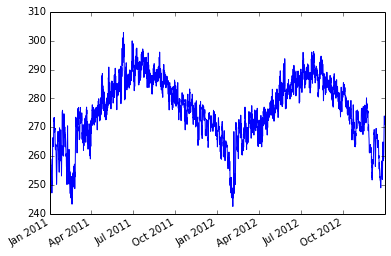

In [37]:
fig = figure()
plot(time_conv, air[:,10,10])
fig.autofmt_xdate()

Note that we don't have to apply *scale factor* and *add offset*, it's done automatically.

<matplotlib.colorbar.Colorbar instance at 0xc90db90>

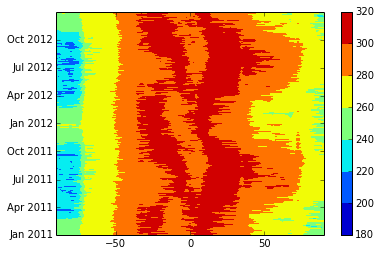

In [38]:
contourf(lat[:],time_conv,air[:,:,10])
colorbar()